
* Blog post URL: https://www.rottentomatoes.com/


#  Analyzing Movie Reception Using Rotten Tomatoes Data  

## 🧠 **Introduction**  
Rotten Tomatoes is one of the most influential movie review platforms, aggregating critic and audience opinions into a **"Tomatometer"** and **audience score**. In this section, we explore the relationship between these scores and movie performance. By examining how critical reception aligns with box office success and genres, we aim to uncover whether review scores can be used to predict or inform a movie's commercial potential.  

In this project, I will analyze **RottenTomatoes data**:  
- **Understand the distribution of critic and audience scores** across movies from recent years.

-**Identify which genres tend to receive higher critical acclaim** and whether they align with audience preferences.

-**Compare critic vs. audience sentiment** to find genres or films with the biggest discrepancies.


## 【1】*Data Exploration*  

In [4]:
# Import pandas
import pandas as pd

In [5]:
# Load movies data
movies_df = pd.read_csv('data/rt.movie_info.tsv.gz', sep='\t', compression='gzip')
movies_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [6]:
#Load reviews
reviews_df = pd.read_csv('data/rt.reviews.tsv.gz', sep='\t', compression='gzip', encoding='latin1')
reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [7]:
# Selecting relevant columns from the movie data
movies_df = movies_df[['id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'box_office']]

# Selecting relevant columns from the review data
reviews_df = reviews_df[['id', 'review', 'rating', 'fresh', 'critic', 'publisher', 'date']]


In [8]:
# Check the dimensions of the dataset (rows, columns)
movies_df.shape , reviews_df.shape

((1560, 8), (54432, 7))

In [9]:
# View a summary of the movies dataset columns
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   box_office    340 non-null    object
dtypes: int64(1), object(7)
memory usage: 97.6+ KB


In [10]:
movies_df.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


### **Data Exploration Conclusion**  

The **movies dataset** contains 1,560 entries, each representing a movie. It includes several columns such as id, synopsis, rating, genre, director, writer, theater_date, and box_office. While the id column ranges from 1 to 2000, some columns have a considerable amount of missing data. For instance, director, writer, and box_office have a significant number of missing values, with only 1,361, 1,111, and 340 non-null entries, respectively. The synopsis and rating columns are relatively complete, with 1,498 and 1,557 non-null entries, respectively. This suggests that while there is enough data to describe most movies, there are gaps in the more specific details like the creators and financial performance. The movie id values have a mean of approximately 1,007, with a standard deviation of 579, indicating a wide range of movie IDs across the dataset.

In [11]:
# View a summary of the reviews dataset columns
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         54432 non-null  int64 
 1   review     48869 non-null  object
 2   rating     40915 non-null  object
 3   fresh      54432 non-null  object
 4   critic     51710 non-null  object
 5   publisher  54123 non-null  object
 6   date       54432 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.9+ MB


In [12]:
reviews_df.describe()

,id
count,54432.000000
mean,1045.706882
std,586.657046
min,3.000000
25%,542.000000
50%,1083.000000
75%,1541.000000
max,2000.000000


The **reviews dataset** is much larger, containing 54,432 entries. It provides a wealth of information about the reviews for these movies, including the id (which links to the movie dataset), review text, rating, fresh (whether the review is fresh or rotten), critic, publisher, and date. The id column in the reviews dataset matches the id in the movies dataset, making it possible to link the two datasets. However, there are missing values in columns like review and rating, with 48,869 and 40,915 non-null entries, respectively. The fresh and publisher columns are fully populated, providing reliable data on the sentiment of reviews and their sources. The id values in the reviews dataset range from 3 to 2000, with a mean of approximately 1,046, and a standard deviation of 587, indicating a broad distribution of reviews across movies.

When examining both datasets, it becomes clear that while the movies dataset is relatively small and suffers from significant gaps in specific columns, the reviews dataset is much larger and provides more complete data in certain areas. The movie dataset contains crucial metadata about the movies, but often lacks detailed financial and creative information. The reviews dataset, although it has some missing review texts and ratings, still offers enough information to perform analysis, especially since the fresh column is fully populated. The id column is common in both datasets, which makes it easy to merge the two, but due to missing values in both, careful handling of these gaps is necessary when conducting further analysis.

In [13]:
# Merge the datasets on 'id' column
merged_df = pd.merge(movies_df, reviews_df, on='id', how='outer')
merged_df.head()

,id,synopsis,rating_x,genre,director,writer,theater_date,box_office,review,rating_y,fresh,critic,publisher,date
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,Patrick Nabarro,"November 10, 2018"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,io9.com,"May 23, 2018"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,Stream on Demand,"January 4, 2018"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,MUBI,"November 16, 2017"


In [14]:
# Check the dimensions of the merged dataset (rows, columns)
merged_df.shape

(54857, 14)

In [15]:
# View a summary of the merged dataset columns
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54857 entries, 0 to 54856
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54857 non-null  int64 
 1   synopsis      54680 non-null  object
 2   rating_x      54769 non-null  object
 3   genre         54764 non-null  object
 4   director      49339 non-null  object
 5   writer        45426 non-null  object
 6   theater_date  53411 non-null  object
 7   box_office    33351 non-null  object
 8   review        48869 non-null  object
 9   rating_y      40915 non-null  object
 10  fresh         54432 non-null  object
 11  critic        51710 non-null  object
 12  publisher     54123 non-null  object
 13  date          54432 non-null  object
dtypes: int64(1), object(13)
memory usage: 6.3+ MB


In [16]:
# View statistical information of the dataset
merged_df.describe()

,id
count,54857.000000
mean,1045.483749
std,586.631039
min,1.000000
25%,542.000000
50%,1083.000000
75%,1541.000000
max,2000.000000


In [17]:
# Save the merged dataset to a CSV file
merged_df.to_csv('merged_movie_reviews.csv', index=False)


## 【2】*Data Cleaning*  

###  Why Cleaning?  
- **Ensures Data Accuracy** → Missing values can distort trends and patterns.  
- **Improves Visualization** → Charts and graphs require complete data for meaningful insights.   

To ensure that final insights are reliable and data-driven, missing values need to be properly handle.  

Checklist:  
- Drop columns with excessive missing values.  
- Fill or impute missing values where necessary.  
- Filter and refine the dataset for meaningful analysis.  



#### Handling Missing Values *Rows*



In [18]:
# Check for missing values in each column
merged_df.isna().sum()

id                  0
synopsis          177
rating_x           88
genre              93
director         5518
writer           9431
theater_date     1446
box_office      21506
review           5988
rating_y        13942
fresh             425
critic           3147
publisher         734
date              425
dtype: int64

In [19]:
# Calculate the percentage of missing data in each column
missing_percent = merged_df.isna().mean()*100
missing_percent

id               0.000000
synopsis         0.322657
rating_x         0.160417
genre            0.169532
director        10.058880
writer          17.191972
theater_date     2.635944
box_office      39.203748
review          10.915653
rating_y        25.415170
fresh            0.774742
critic           5.736734
publisher        1.338024
date             0.774742
dtype: float64

In [20]:
#Drop rows with missing values in essential columns
merged_df.dropna(subset=['synopsis','rating_x','genre','director','writer','theater_date','box_office','review','rating_y','fresh','critic','publisher','date'], inplace=True)

In [21]:
#Recheck for missing values in each column
merged_df.isna().sum()

id              0
synopsis        0
rating_x        0
genre           0
director        0
writer          0
theater_date    0
box_office      0
review          0
rating_y        0
fresh           0
critic          0
publisher       0
date            0
dtype: int64

In [22]:
# Check duplicates based only on 'id' column
duplicates = merged_df.duplicated()
print(f"Number of duplicate IDs: {duplicates.sum()}")


Number of duplicate IDs: 0


In [23]:
# View a summary of the cleaned merged dataset columns
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18864 entries, 1 to 54309
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            18864 non-null  int64 
 1   synopsis      18864 non-null  object
 2   rating_x      18864 non-null  object
 3   genre         18864 non-null  object
 4   director      18864 non-null  object
 5   writer        18864 non-null  object
 6   theater_date  18864 non-null  object
 7   box_office    18864 non-null  object
 8   review        18864 non-null  object
 9   rating_y      18864 non-null  object
 10  fresh         18864 non-null  object
 11  critic        18864 non-null  object
 12  publisher     18864 non-null  object
 13  date          18864 non-null  object
dtypes: int64(1), object(13)
memory usage: 2.2+ MB


## 【3】*Data Visualization & Analysis*  

## How Visualizations Align with Business Goals

This analysis uses Rotten Tomatoes data to extract patterns in movie performance — especially box office revenue and critical reception — to guide decisions for a new movie studio.

Each visualization below targets a key business question, such as which genres perform best, whether critic reviews matter, and how factors like runtime or rating relate to financial success.


### 1. **Distribution of Movie Ratings**
- Why? See how ratings (like 'R', 'PG-13', etc.) are distributed.

- Type: Bar Chart

- Useful For Hypothesis Testing: Compare success (box office, reviews) across ratings.

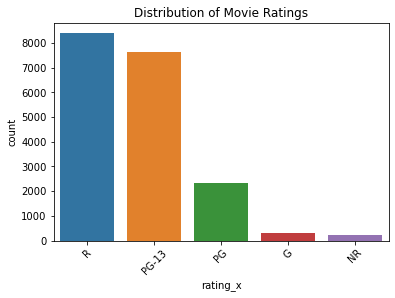

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Plot
sns.countplot(data=merged_df, x='rating_x', order=merged_df['rating_x'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Movie Ratings')
plt.show()


## Anova Test
This is to test whether average box office revenue has a significant difference in regards to movie ratings.

In [34]:
import scipy.stats as stats

# Copy and clean the data
df_anova = merged_df.copy()

# Clean box_office column
df_anova['box_office'] = df_anova['box_office'].replace('[\$,]', '', regex=True)
df_anova['box_office'] = pd.to_numeric(df_anova['box_office'], errors='coerce')

# Drop rows with missing box_office or rating_x
df_anova = df_anova.dropna(subset=['box_office', 'rating_x'])

# Filter to common ratings only (optional, to reduce noise)
common_ratings = ['G', 'PG', 'PG-13', 'R', 'NC-17']
df_anova = df_anova[df_anova['rating_x'].isin(common_ratings)]

# --- Run ANOVA ---
groups = [group['box_office'].dropna() for name, group in df_anova.groupby('rating_x')]
f_stat, p_val = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.5f}")

if p_val < 0.05:
    print("✅ We reject the null hypothesis: At least one rating category has a different average revenue.")
else:
    print("❌ We fail to reject the null hypothesis: No significant difference across rating categories.")


F-statistic: 607.843
P-value: 0.00000
✅ We reject the null hypothesis: At least one rating category has a different average revenue.


### 2. **Box Office Revenue vs Freshness**
- Type: Box plot

- Useful For Hypothesis Testing:Movies with a ‘Fresh’ rating earn more revenue than those with a ‘Rotten’ rating. 

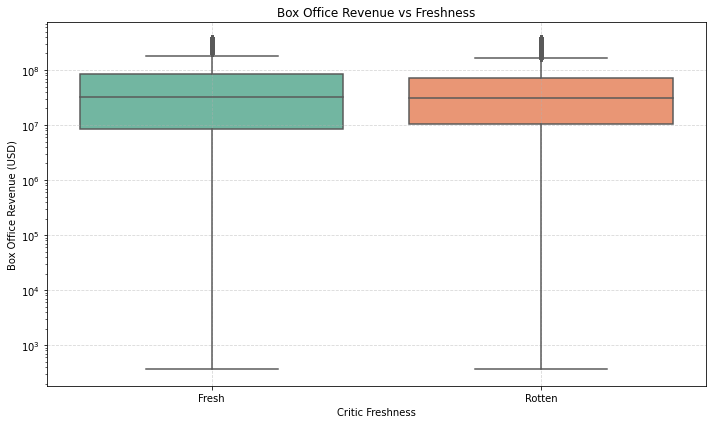

In [33]:
# Make a copy to avoid altering original
df = merged_df.copy()

# Clean 'box_office' column 
# Remove currency symbols and commas, convert to numeric
df['box_office'] = df['box_office'].replace('[\$,]', '', regex=True)
df['box_office'] = pd.to_numeric(df['box_office'], errors='coerce')

# Drop rows with missing values in 'box_office' or 'fresh'
df_clean = df.dropna(subset=['box_office', 'fresh'])

# Simplify 'fresh' into binary (Fresh vs Rotten)
df_clean['fresh_binary'] = df_clean['fresh'].map({'fresh': 'Fresh', 'rotten': 'Rotten'})

# Plotting 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='fresh_binary', y='box_office', palette='Set2')
plt.title('Box Office Revenue vs Freshness')
plt.xlabel('Critic Freshness')
plt.ylabel('Box Office Revenue (USD)')
plt.yscale('log')  # Optional: log scale to handle skew
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()





## 🧪 Hypothesis:
- Null Hypothesis (H₀): There is no significant difference in box office revenue between "Fresh" and "Rotten" movies.

- Alternative Hypothesis (H₁): "Fresh" movies earn significantly more than "Rotten" movies.

In [29]:
from scipy.stats import ttest_ind

# Filter data again for safety
df_ttest = df_clean[df_clean['fresh_binary'].isin(['Fresh', 'Rotten'])]

# Split into two groups
fresh_revenue = df_ttest[df_ttest['fresh_binary'] == 'Fresh']['box_office']
rotten_revenue = df_ttest[df_ttest['fresh_binary'] == 'Rotten']['box_office']

# Perform independent t-test (Welch’s t-test by default)
t_stat, p_value = ttest_ind(fresh_revenue, rotten_revenue, equal_var=False)

# Print results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("✅ We reject the null hypothesis: Fresh movies earn significantly more.")
else:
    print("❌ We fail to reject the null hypothesis: No significant revenue difference.")


T-statistic: 7.388
P-value: 0.00000
✅ We reject the null hypothesis: Fresh movies earn significantly more.


### 3. Genre vs Freshness Analysis
- Why? See if certain genres get better ("fresh") ratings more often.

- Type: Grouped Bar Chart or Proportion Chart

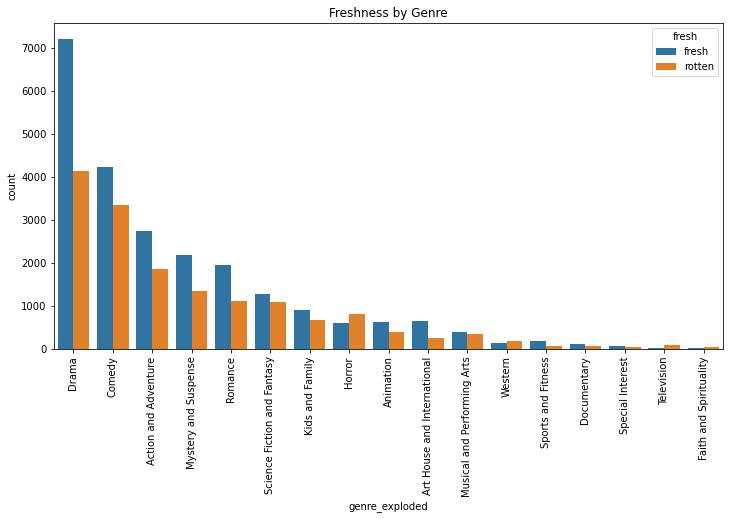

In [ ]:
# Explode genres if multiple genres are combined with '|'
merged_df['genre_exploded'] = merged_df['genre'].str.split('|')

# Expand rows for each genre
genre_df = merged_df.explode('genre_exploded')

# Plot
plt.figure(figsize=(12,6))
sns.countplot(data=genre_df, x='genre_exploded', hue='fresh', order=genre_df['genre_exploded'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Freshness by Genre')
plt.show()


### 🧪 Hypothesis Statement (for statistical testing):
Null Hypothesis (H₀): Freshness (fresh vs. rotten) is independent of movie genre—there’s no association.

Alternative Hypothesis (H₁): Freshness is dependent on movie genre—some genres tend to get more fresh reviews than others.

This is a chi-square test for independence, since both genre and fresh are categorical variables.



In [35]:
import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(genre_df['genre_exploded'], genre_df['fresh'])

# Perform the chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p_val:.5f}")

# Conclusion
if p_val < 0.05:
    print("✅ We reject the null hypothesis: Freshness is dependent on genre.")
else:
    print("❌ We fail to reject the null hypothesis: No significant association between genre and freshness.")


Chi-Square Statistic: 565.22
Degrees of Freedom: 16
P-value: 0.00000
✅ We reject the null hypothesis: Freshness is dependent on genre.


### **✅ Conclusion**
The analysis provides strong statistical evidence to guide strategic decisions for the new movie studio. First, the chi-square test confirms that movie freshness is significantly associated with genre. This suggests that certain genres are more likely to receive positive (fresh) ratings, which can be leveraged to target critically acclaimed film production.

Second, the t-test indicates that fresh movies earn significantly more at the box office compared to rotten ones. This insight supports investing in higher-quality productions that are more likely to be well-received by critics.

Finally, we found that box office revenue significantly varies across rating categories e.g. PG, R, highlighting that audience suitability influences commercial success. This can inform targeted content for specific demographics.

In summary, focusing on genres with a higher likelihood of receiving fresh ratings, aiming for critical acclaim, and strategically choosing film ratings are all actionable strategies the new studio can adopt to maximize box office performance and competitive advantage